In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, \
                                GradientBoostingClassifier, VotingClassifier

from sklearn.metrics import classification_report, precision_recall_curve, roc_curve

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
df.iloc[:20]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   Female              0     Yes         No       1           No   
1     Male              0      No         No      34          Yes   
2     Male              0      No         No       2          Yes   
3     Male              0      No         No      45           No   
4   Female              0      No         No       2          Yes   
5   Female              0      No         No       8          Yes   
6     Male              0      No        Yes      22          Yes   
7   Female              0      No         No      10           No   
8   Female              0     Yes         No      28          Yes   
9     Male              0      No        Yes      62          Yes   
10    Male              0     Yes        Yes      13          Yes   
11    Male              0      No         No      16          Yes   
12    Male              0     Yes         No      58          Yes   
13    Male              0      No         No      49          Yes   
14    Male              0      No         No      25          Yes   
15  Female              0     Yes        Yes      69          Yes   
16  Female              0      No         No      52          Yes   
17    Male              0      No        Yes      71          Yes   
18  Female              0     Yes        Yes      10          Yes   
19  Female              0      No         No      21          Yes   

       MultipleLines InternetService       OnlineSecurity  \
0   No phone service             DSL                   No   
1                 No             DSL                  Yes   
2                 No             DSL                  Yes   
3   No phone service             DSL                  Yes   
4                 No     Fiber optic                   No   
5                Yes     Fiber optic                   No   
6                Yes     Fiber optic                   No   
7   No phone service             DSL                  Yes   
8                Yes     Fiber optic                   No   
9                 No             DSL                  Yes   
10                No             DSL                  Yes   
11                No              No  No internet service   
12               Yes     Fiber optic                   No   
13               Yes     Fiber optic                   No   
14                No     Fiber optic                  Yes   
15               Yes     Fiber optic                  Yes   
16                No              No  No internet service   
17               Yes     Fiber optic                  Yes   
18                No             DSL                   No   
19                No     Fiber optic                   No   

           OnlineBackup     DeviceProtection          TechSupport  \
0                   Yes                   No                   No   
1                    No                  Yes                   No   
2                   Yes                   No                   No   
3                    No                  Yes                  Yes   
4                    No                   No                   No   
5                    No                  Yes                   No   
6                   Yes                   No                   No   
7                    No                   No                   No   
8                    No                  Yes                  Yes   
9                   Yes                   No                   No   
10                   No                   No                   No   
11  No internet service  No internet service  No internet service   
12                   No                  Yes                   No   
13                  Yes                  Yes                   No   
14                   No                  Yes                  Yes   
15                  Yes                  Yes                  Yes   
16  No internet service  No internet service  No internet service   
17                   No       

### Univariate

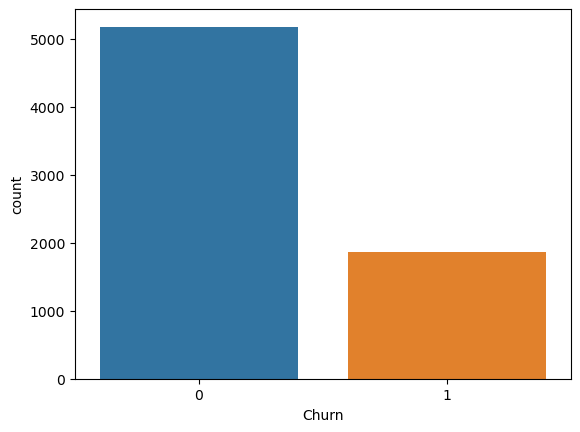

In [6]:
sns.countplot(x=df.Churn);

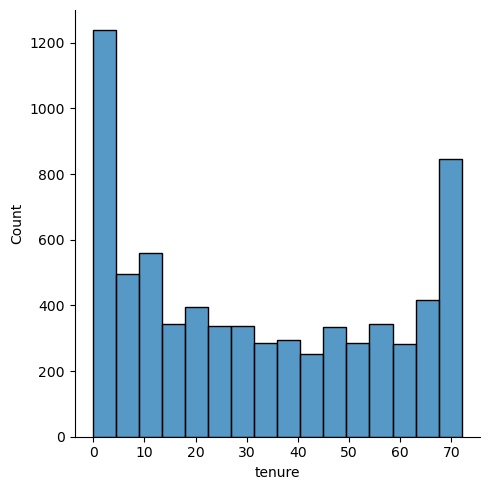

In [7]:
sns.displot(x=df.tenure)

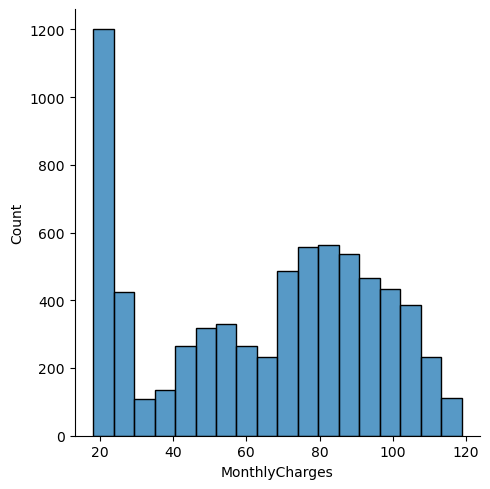

In [8]:
sns.displot(x=df.MonthlyCharges)

### Multivariate

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

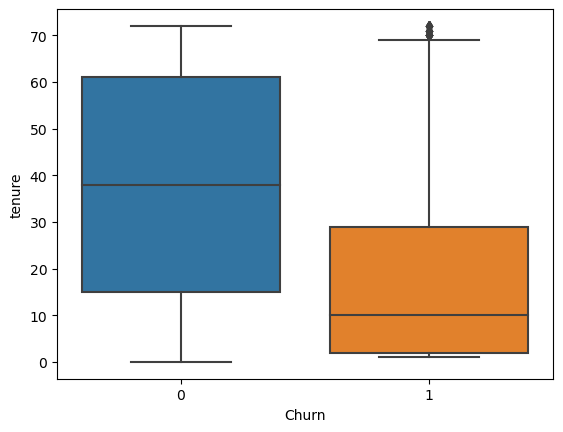

In [9]:
sns.boxplot(x=df.Churn, y=df.tenure)

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

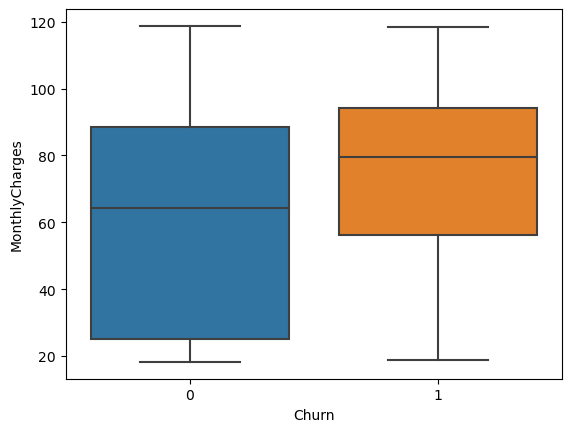

In [10]:
sns.boxplot(x=df.Churn, y=df.MonthlyCharges)

<AxesSubplot:xlabel='Churn'>

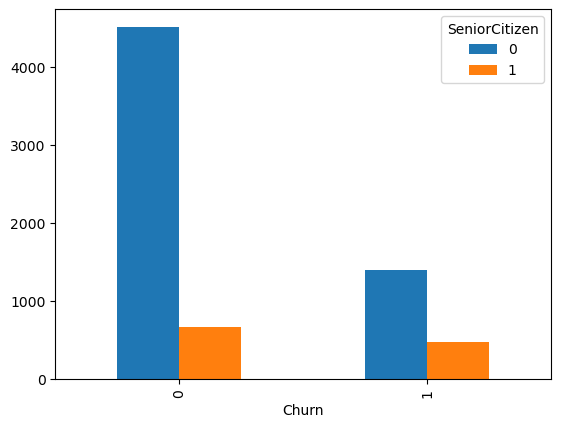

In [11]:
pd.crosstab(index=df.Churn, columns=df.SeniorCitizen).plot.bar()

In [12]:
pd.crosstab(index=df.SeniorCitizen, columns=df.Churn).plot.bar()

<AxesSubplot:xlabel='SeniorCitizen'>

In [13]:
pd.crosstab(index=df.Contract, columns=df.Churn).plot.bar()

<AxesSubplot:xlabel='Contract'>

<AxesSubplot:xlabel='PaperlessBilling'>

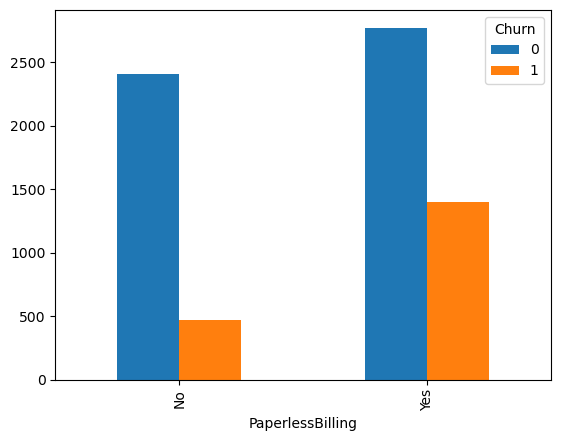

In [14]:
pd.crosstab(index=df.PaperlessBilling, columns=df.Churn).plot.bar()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [16]:
X = df.drop(['Churn', 'TotalCharges', 'tenure'], axis=1)
y = df['Churn']

In [17]:
X_dummies = pd.get_dummies(X, drop_first=True)

### Random Forest

In [18]:
train_X, test_X, train_y, test_y = train_test_split(X_dummies, y, test_size=0.3)

In [19]:
rf = RandomForestClassifier(class_weight={0:0.2, 1:0.8})
rf.fit(train_X, train_y)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8})

In [20]:
rf.score(train_X, train_y)

0.9945233265720081

In [21]:
rf.score(test_X, test_y)

0.7520113582584004

In [22]:
print(classification_report(test_y, rf.predict(test_X)))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1573
           1       0.52      0.42      0.47       540

    accuracy                           0.75      2113
   macro avg       0.67      0.64      0.65      2113
weighted avg       0.74      0.75      0.74      2113



In [23]:
pred_y_prob = rf.predict_proba(test_X)[:,1]
precision, recall, thresh = precision_recall_curve(test_y, pred_y_prob)

In [24]:
thresh.shape

(183,)

In [25]:
precision.shape

(184,)

In [26]:
plt.figure(figsize=(16,5))
plt.grid(True)

plt.subplot(131)
plt.title('Precision vs Recall')
plt.plot(precision, recall)
plt.xlabel('Pecision')
plt.ylabel('Recall')
plt.grid(True)

plt.subplot(132)
plt.title('Threshold vs Recall')
plt.plot(thresh, recall[:-1])
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.grid(True)
plt.subplot(133)

plt.title('Threshold vs Precision')
plt.plot(thresh, precision[:-1])
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.grid(True)

In [27]:
prob = rf.predict_proba(test_X)[:,1]

In [28]:
prob[prob > 0.35] = 1

In [29]:
prob[prob != 1] = 0

In [30]:
prob

array([0., 0., 1., ..., 1., 0., 1.])

In [31]:
print(classification_report(test_y, prob))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1573
           1       0.47      0.60      0.53       540

    accuracy                           0.73      2113
   macro avg       0.66      0.69      0.67      2113
weighted avg       0.75      0.73      0.74      2113



### Hyper-parameter Tuning

In [32]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {
    'n_estimators' : [50, 100, 150, 200], # how many decision trees need to be created
    'criterion' : ['gini', 'entropy'], # decision 
    'max_depth' : [3,5,7], # height
    'min_samples_leaf' : [3,5,7] # min number of samples needed to be considered as a leaf node
    
}

In [35]:
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='recall', verbose=2)

In [36]:
grid.fit(X_dummies, y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, n_estimators=100; total time= 

[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, n_estimators=150; total time=   0.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, n_estimators=150; total time=   0.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, n_estimators=150; total time=   0.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, n_estimators=150; total time=   0.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, n_estimators=150; total time=   0.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=5, min_samples_

[CV] END criterion=gini, max_depth=7, min_samples_leaf=7, n_estimators=150; total time=   0.3s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=7, n_estimators=150; total time=   0.3s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=7, n_estimators=200; total time=   0.5s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=7, n_estimators=200; total time=   0.5s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=7, n_estimators=200; total time=   0.5s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=7, n_estimators=200; total time=   0.5s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=7, n_estimators=200; total time=   0.4s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min

[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, n_estimators=200; total time=   0.4s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, n_estimators=200; total time=   0.4s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entrop

[CV] END criterion=entropy, max_depth=7, min_samples_leaf=7, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=7, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=7, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=7, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=7, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=7, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=7, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=7, n_estimators=150; total time=   0.4s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=7, n_estimators=150; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=7, n_estimators=150; total time=   0.4s
[CV] END criterion=ent

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [3, 5, 7],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='recall', verbose=2)

In [37]:
print(classification_report(y, grid.predict(X_dummies)))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      5174
           1       0.68      0.43      0.53      1869

    accuracy                           0.79      7043
   macro avg       0.75      0.68      0.70      7043
weighted avg       0.78      0.79      0.78      7043



In [38]:
pred_y_prob = grid.predict_proba(test_X)[:,1]
precision, recall, thresh = precision_recall_curve(test_y, pred_y_prob)

In [39]:
thresh.shape

(1629,)

In [40]:
precision.shape

(1630,)

In [41]:
plt.figure(figsize=(16,5))
plt.grid(True)

plt.subplot(131)
plt.title('Precision vs Recall')
plt.plot(precision, recall)
plt.xlabel('Pecision')
plt.ylabel('Recall')
plt.grid(True)

plt.subplot(132)
plt.title('Threshold vs Recall')
plt.plot(thresh, recall[:-1])
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.grid(True)
plt.subplot(133)

plt.title('Threshold vs Precision')
plt.plot(thresh, precision[:-1])
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.grid(True)

In [42]:
prob = grid.predict_proba(test_X)[:,1]

In [43]:
prob

array([0.09287902, 0.24561622, 0.21123574, ..., 0.3576194 , 0.0174499 ,
       0.54987714])

In [44]:
prob[prob >= 0.4] = 1

In [45]:
prob[prob != 1] = 0

In [46]:
prob

array([0., 0., 0., ..., 0., 0., 1.])

In [47]:
print(classification_report(test_y, prob))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1573
           1       0.59      0.64      0.62       540

    accuracy                           0.79      2113
   macro avg       0.73      0.74      0.74      2113
weighted avg       0.80      0.79      0.80      2113



In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(test_y, prob)

0.7946048272598202

### Bagging Classifier

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
bag = BaggingClassifier(KNeighborsClassifier(), n_estimators=50)

In [55]:
bag.fit(train_X, train_y)

BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=50)

In [56]:
bag.score(train_X, train_y)

0.8330628803245436

In [57]:
bag.score(test_X, test_y)

0.7368670137245622

In [58]:
print(classification_report(test_y, bag.predict(test_X)))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1573
           1       0.49      0.48      0.48       540

    accuracy                           0.74      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.74      0.74      0.74      2113



### AdaptiveBoosting (AdaBoost)

In [59]:
ada = AdaBoostClassifier(n_estimators=50)
ada.fit(train_X, train_y)

AdaBoostClassifier()

In [60]:
print(classification_report(test_y, ada.predict(test_X)))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1573
           1       0.57      0.54      0.56       540

    accuracy                           0.78      2113
   macro avg       0.71      0.70      0.70      2113
weighted avg       0.78      0.78      0.78      2113



### GradientBoosting

In [61]:
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, tol=0.0001)
gb.fit(train_X, train_y)
print(classification_report(test_y, gb.predict(test_X)))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1573
           1       0.50      0.48      0.49       540

    accuracy                           0.74      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.74      0.74      0.74      2113



### Stacking

In [62]:
vot = VotingClassifier(estimators=[
    ('knn', KNeighborsClassifier()),
    ('ada', AdaBoostClassifier()),
    ('gb', GradientBoostingClassifier())
], voting='soft')

In [63]:
vot.fit(np.ascontiguousarray(train_X), train_y)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('ada', AdaBoostClassifier()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft')

In [64]:
print(classification_report(test_y, vot.predict(np.ascontiguousarray(test_X))))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1573
           1       0.55      0.51      0.53       540

    accuracy                           0.77      2113
   macro avg       0.69      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113



## working  Session

In [65]:
X1 = df.drop(['Churn', 'TotalCharges'], axis=1)
y1 = df['Churn']

In [66]:
X_dummies1 = pd.get_dummies(X, drop_first=True)

In [67]:
# RANDOM FOREST

In [68]:
train_X1, test_X1, train_y1, test_y1 = train_test_split(X_dummies1, y1, test_size=0.3)

In [69]:
rf = RandomForestClassifier(class_weight={0:0.2, 1:0.8})
rf.fit(train_X1, train_y1)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8})

In [70]:
rf.score(train_X1, train_y1)

0.9949290060851927